##  Autoencode +  transfer_learning_VGG16  Converting  grayscale to colored images (RGB)

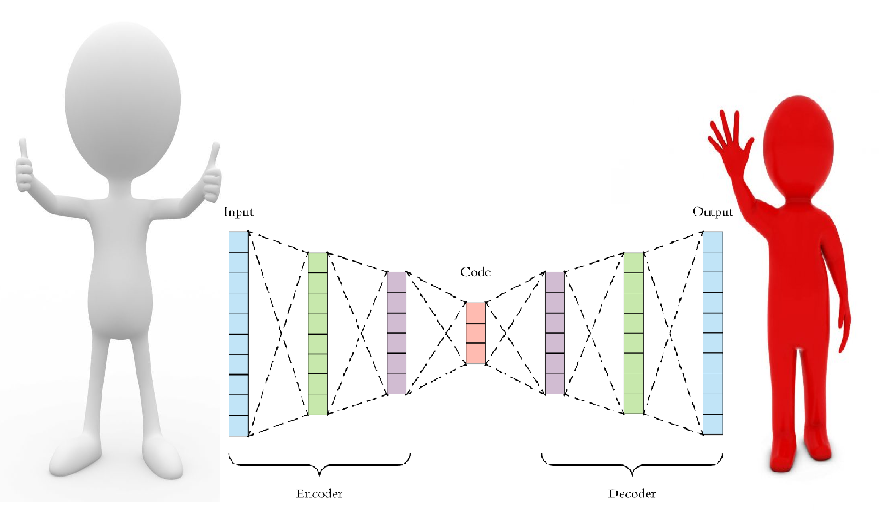

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrvmurali","key":"b52d02bd18b2eed468ba2144e5ad2c6b"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d theblackmamba31/landscape-image-colorization

 93% 178M/192M [00:01<00:00, 106MB/s] 
100% 192M/192M [00:01<00:00, 102MB/s]


In [8]:
!unzip "landscape-image-colorization.zip"

Streaming output truncated to the last 5000 lines.
  inflating: landscape Images/gray/2914.jpg  
  inflating: landscape Images/gray/2915.jpg  
  inflating: landscape Images/gray/2916.jpg  
  inflating: landscape Images/gray/2917.jpg  
  inflating: landscape Images/gray/2918.jpg  
  inflating: landscape Images/gray/2919.jpg  
  inflating: landscape Images/gray/292.jpg  
  inflating: landscape Images/gray/2920.jpg  
  inflating: landscape Images/gray/2921.jpg  
  inflating: landscape Images/gray/2922.jpg  
  inflating: landscape Images/gray/2923.jpg  
  inflating: landscape Images/gray/2924.jpg  
  inflating: landscape Images/gray/2925.jpg  
  inflating: landscape Images/gray/2926.jpg  
  inflating: landscape Images/gray/2927.jpg  
  inflating: landscape Images/gray/2928.jpg  
  inflating: landscape Images/gray/2929.jpg  
  inflating: landscape Images/gray/293.jpg  
  inflating: landscape Images/gray/2930.jpg  
  inflating: landscape Images/gray/2931.jpg  
  inflating: landscape Images/g

In [9]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Input,Dropout
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

In [10]:
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

In [11]:
SIZE = 224
color_img = []
path = '/content/landscape Images/color'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):    
    if i == '6000.jpg':
        break
    else:    
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        color_img.append(img_to_array(img))

 84%|████████▎ | 5954/7129 [00:07<00:01, 850.03it/s]


In [12]:
gray_img = []
path ='/content/landscape Images/gray'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
     if i == '6000.jpg':
        break
     else: 
        img = cv2.imread(path + '/'+i,1)

        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        gray_img.append(img_to_array(img))

 84%|████████▍ | 5977/7129 [00:05<00:01, 1003.67it/s]


In [13]:
# defining function to plot images pair
def plot_images(color,grayscale):
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale)
   
    plt.show()

In [14]:
color_img[1]

array([[[0.07843138, 0.11764706, 0.16470589],
        [0.49411765, 0.5411765 , 0.58431375],
        [0.8784314 , 0.93333334, 0.9882353 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.10588235, 0.14117648, 0.19607843],
        [0.5058824 , 0.54901963, 0.6       ],
        [0.87058824, 0.9254902 , 0.9843137 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.13725491, 0.1764706 , 0.23529412],
        [0.52156866, 0.5647059 , 0.61960787],
        [0.87058824, 0.9254902 , 0.9843137 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.54509807, 0.42352942, 0.02352941],
        [0.56078434, 0.43529412, 0.02745098],
        [0.5882353 , 0

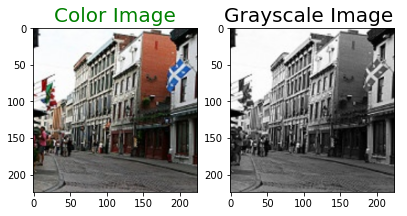

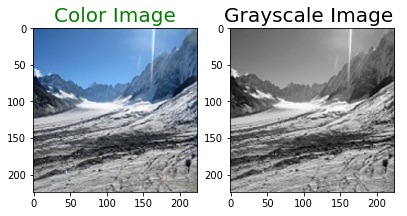

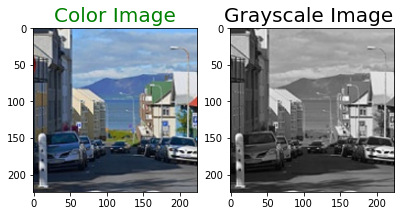

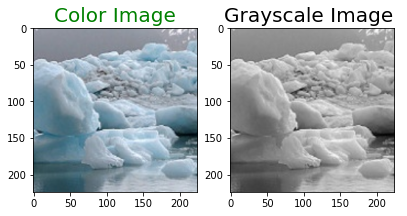

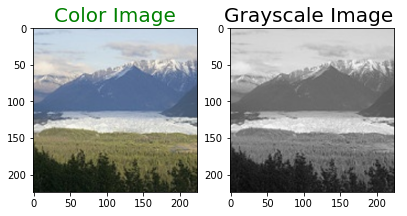

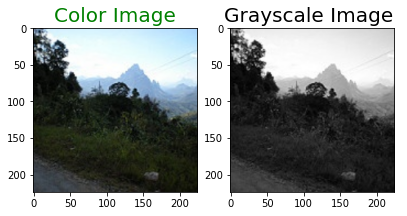

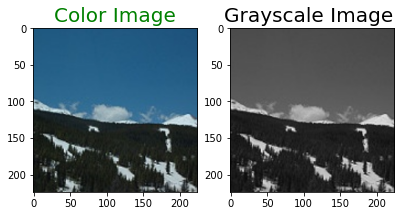

In [15]:
for i in range(3,10):
     plot_images(color_img[i],gray_img[i])

In [16]:
train_gray_image = gray_img[:2000]
train_color_image = color_img[:2000]

test_gray_image = gray_img[2000:2100]
test_color_image = color_img[2000:2100]

In [17]:
# reshaping
train_g = np.reshape(train_gray_image,(len(train_gray_image),SIZE,SIZE,3))
train_c = np.reshape(train_color_image, (len(train_color_image),SIZE,SIZE,3))
print('Train color image shape:',train_c.shape)

Train color image shape: (2000, 224, 224, 3)


In [18]:
test_gray_image = np.reshape(test_gray_image,(len(test_gray_image),SIZE,SIZE,3))
test_color_image = np.reshape(test_color_image, (len(test_color_image),SIZE,SIZE,3))
print('Test color image shape',test_color_image.shape)

Test color image shape (100, 224, 224, 3)


In [19]:
test_gray_image[1].shape

(224, 224, 3)

In [20]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16()
newmodel = Sequential() 
#num = 0
for i, layer in enumerate(vggmodel.layers):
    if i<19:          #Only up to 19th layer to include feature extraction only
      newmodel.add(layer)
newmodel.summary()
for layer in newmodel.layers:
  layer.trainable=False   #We don't want to train these layers again, so False. 

553476096/553467096 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_______________________________________________________

In [21]:
vggfeatures = []
for i, sample in enumerate(train_g):
  sample = sample.reshape((1,224,224,3))
  prediction = newmodel.predict(sample)
  prediction = prediction.reshape((7,7,512))
  vggfeatures.append(prediction)
vggfeatures = np.array(vggfeatures)
print(vggfeatures.shape)

(2000, 7, 7, 512)


In [22]:
from keras import layers
def down(filters , kernel_size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(layers.Conv2D(filters,kernel_size,padding = 'same', strides = 2))
    if apply_batch_normalization:
        downsample.add(layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample

In [23]:
def up(filters, kernel_size, dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(layers.Conv2DTranspose(filters, kernel_size,padding = 'same', strides = 2))
    if dropout:
        upsample.dropout(0.2)
    upsample.add(keras.layers.LeakyReLU())
    return upsample

In [24]:
model = Sequential()
model.add(Conv2D(256, (3,3), activation='relu', padding='same', input_shape=(7,7,512)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 7, 256)         1179904   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         295040    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 56, 56, 32)       

In [25]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

In [26]:
model.fit(vggfeatures, train_c, epochs = 200,batch_size = 16,verbose = 1)

Epoch 1/200
125/125 [==============================] - 11s 14ms/step - loss: 0.2780 - acc: 0.4173
Epoch 2/200
125/125 [==============================] - 2s 13ms/step - loss: 0.1699 - acc: 0.4852
Epoch 3/200
125/125 [==============================] - 2s 14ms/step - loss: 0.1580 - acc: 0.4904
Epoch 4/200
125/125 [==============================] - 2s 13ms/step - loss: 0.1499 - acc: 0.5072
Epoch 5/200
125/125 [==============================] - 2s 14ms/step - loss: 0.1472 - acc: 0.5165
Epoch 6/200
125/125 [==============================] - 2s 13ms/step - loss: 0.1428 - acc: 0.5363
Epoch 7/200
125/125 [==============================] - 2s 13ms/step - loss: 0.1402 - acc: 0.5188
Epoch 8/200
125/125 [==============================] - 2s 14ms/step - loss: 0.1352 - acc: 0.5389
Epoch 9/200
125/125 [==============================] - 2s 13ms/step - loss: 0.1339 - acc: 0.5369
Epoch 10/200
125/125 [==============================] - 2s 14ms/step - loss: 0.1328 - acc: 0.5477
Epoch 11/200
125/125 [======

In [32]:
def plot_image(grayscale,predicted):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Grayscale Image ', color = 'black', fontsize = 12)
    plt.imshow(grayscale)
    plt.subplot(1,2,2)
    plt.title('Predicted Image ', color = 'Red', fontsize = 12)
    plt.imshow(predicted)
    
   
    plt.show()

In [39]:
def pred(path):
    test = img_to_array(load_img(path))
    test = resize(test, (224,224), anti_aliasing=True)
    test*= 1.0/255
    
    L = test.reshape((1,224,224,3))
    #print(L.shape)
    vggpred = newmodel.predict(L)
    ab = model.predict(vggpred)
    ab=ab.reshape((224,224,3))
    #print(ab.shape)
    plot_image(test,ab)

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.transform import resize

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


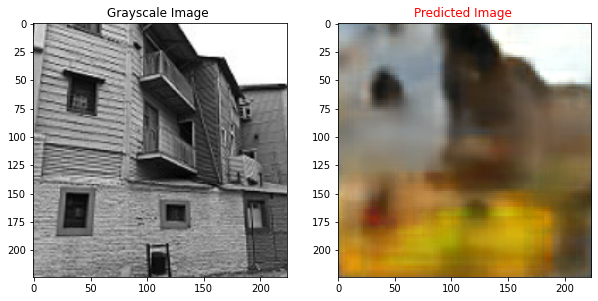

In [40]:
pred("/content/landscape Images/gray/1.jpg")